In [1]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

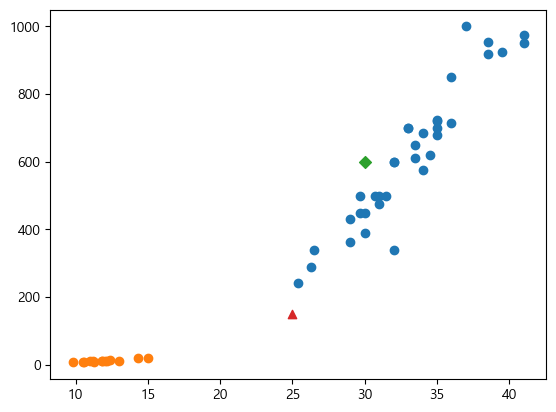

In [4]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')

### length => 합치기(bream_length,smelt_length)
### weight => 합치기(bream_weight,smelt_weight)

### datas = length, weight 합치기
### train_input,test_input,train_target,test_target

# 개수 49개

In [5]:
# 데이터의 전처리 과정을 해보세요.
# train_input,test
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
len(bream_length) # 도미데이터 - 35
# len(smelt_length) # 빙어데이터 - 14
results = [1]*35+[0]*14 # 1:도미, 0:빙어

# zip(): 반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌.
# datas = [[l,w,r] for l,w,r in zip(length,weight,results)]
datas = [[l,w] for l,w in zip(length,weight)]
df = pd.DataFrame(datas)

In [44]:
# datas,results 49개를
# datats : train_input:35개,test_input:14개
# results : train_target:35개,test_target:14개
# 파이썬 random함수를 사용해서
# 49개 중 35개 데이터는 train_input,train_target  / 14개는 test_input,test_target
# 출력하시오

In [6]:
# 랜덤숫자 생성
index = [i for i in range(49)]
random.shuffle(index)
print(index)

[25, 19, 14, 44, 34, 40, 28, 36, 42, 47, 15, 46, 32, 3, 2, 9, 13, 23, 6, 33, 1, 4, 26, 22, 7, 0, 29, 8, 45, 48, 20, 31, 5, 12, 39, 11, 24, 10, 43, 27, 38, 16, 17, 30, 18, 21, 41, 35, 37]


In [7]:
# DataFrame을 사용하지 않고, for문을 사용해서 35,14개를 분리해서 출력하시오.
# 파이썬 random함수 사용해서 전처리
train_input = [datas[i] for i in index[:35]]
test_input = [datas[i] for i in index[35:]]
train_target = [results[i] for i in index[:35]]
test_target = [results[i] for i in index[35:]]

In [54]:
# 1. 데이터 전처리 - pandas사용
# train_input = df.iloc[index[:35],:-1]
# test_input = df.iloc[index[35:],:-1]
# train_target = df.iloc[index[:35],2]
# test_target = df.iloc[index[35:],:2]

In [8]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,31.0,500.0


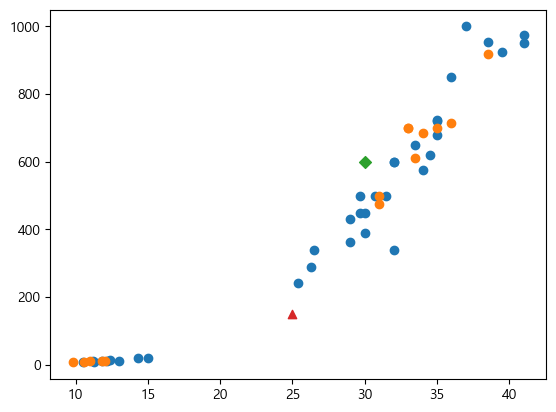

In [9]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')

In [10]:
# 데이터 학습시키기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 데이터 예측하기
pre = clf.predict(test_input)
print("데이터 예측결과 : ",pre)

데이터 예측결과 :  [1 1 1 0 1 0 1 1 1 1 1 0 0 0]


In [11]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌.
distances,indexs =  clf.kneighbors([[25,150]])

In [12]:
indexs

array([[25, 29,  9, 28, 11]], dtype=int64)

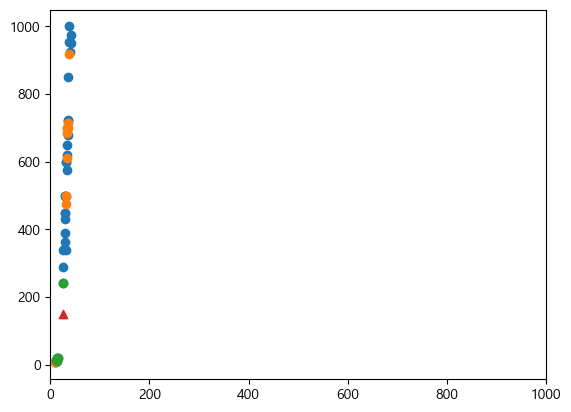

In [17]:
plt.xlim(0,1000)
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])
plt.scatter(25,150,marker='^')

In [13]:
# 정답률 구하기
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [14]:
# 길이 30, 무게 600 고기 무엇인지 판단하시오.
# [30,600]
# 데이터 예측하기
pre = clf.predict([[30,600]])
print("데이터 예측결과 : ",pre)

데이터 예측결과 :  [1]


In [15]:
# 길이 25, 무게 150 고기 무엇인지 판단하시오.
# [25,150]
# 데이터 예측하기
pre = clf.predict([[25,150]])
print("데이터 예측결과 : ",pre)

데이터 예측결과 :  [0]
